# Amirhossein Mesbah - Part 3

In [7]:
from sklearn.metrics import mutual_info_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import scipy.io as spio
from scipy import signal

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [8]:
cond = spio.loadmat('abolqasemi dataset\cond.mat')
cond = cond['Cond'].reshape(1, -1)

## Plot mutual Information

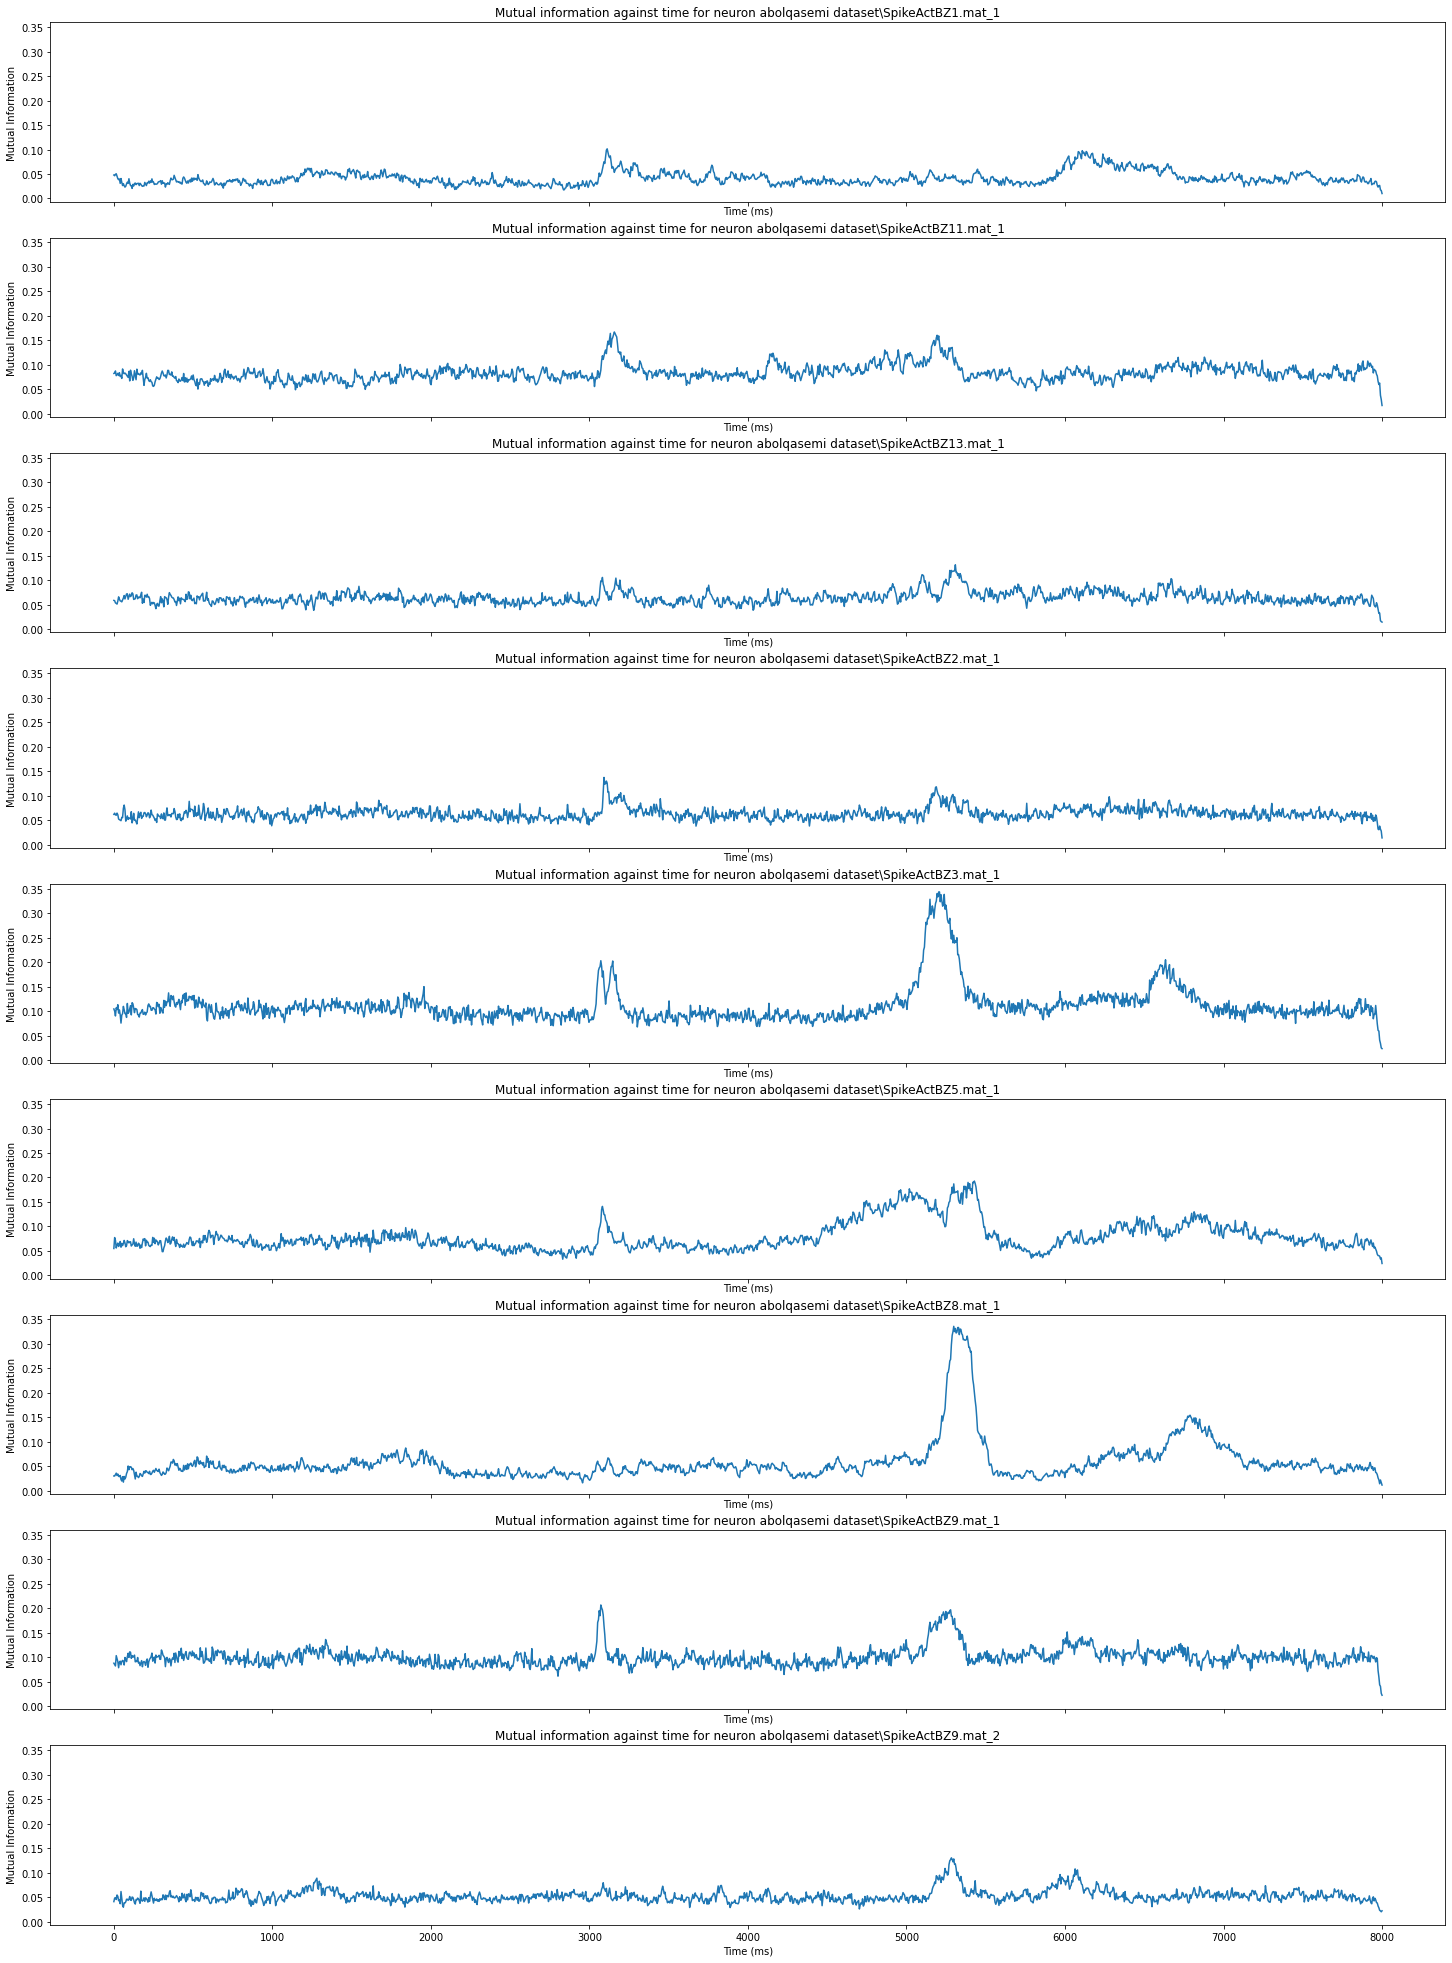

In [9]:
files = glob.glob('abolqasemi dataset\Spike*.mat')
fig, axs = plt.subplots(9, sharex=True, sharey=True, figsize=(25, 35))
j = 0
for file in files:
    ind =1
    neuron = spio.loadmat(file)['su']
    if neuron.shape[0] != 0:
        for n in neuron[0]:
            neuron = n
            ms = []
            for i in range(0,neuron.shape[1], 5):
                mean_spike = np.mean(neuron[:,i:i+50], axis=1)
                mi = calc_MI(mean_spike, cond[0], 100)
                ms.append(mi)
            
            axs[j].plot(np.linspace(0, len(neuron[1]), len(ms)),ms)
            axs[j].set_xlabel("Time (ms)")
            axs[j].set_ylabel("Mutual Information")
            axs[j].set_title(f"Mutual information against time for neuron {file}_{ind}")
            ind +=1
            
            j +=1


## Scatter plot

Text(0, 0.5, 'Saccade MI')

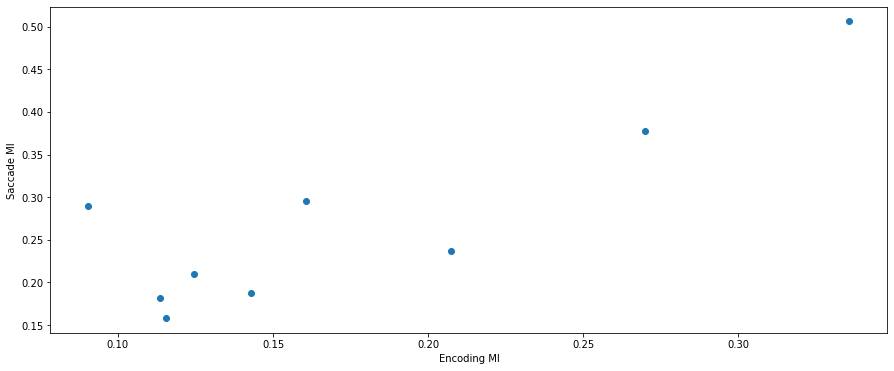

In [10]:
files = glob.glob('abolqasemi dataset\Spike*.mat')
enc = []
sac = []
for file in files:
    neuron = spio.loadmat(file)['su']
    if neuron.shape[0] != 0:
        for n in neuron[0]:
            neuron = n
            mean_encoding = np.mean(neuron[:,3050:3200], axis=1)
            mean_saccade = np.mean(neuron[:,6500:6800], axis=1)
            mi_encoding = calc_MI(mean_encoding, cond[0], 100)
            enc.append(mi_encoding)
            mi_saccade = calc_MI(mean_saccade, cond[0], 100)
            sac.append(mi_saccade)

plt.figure(figsize=(15,6))
plt.scatter(enc, sac)   
plt.xlabel("Encoding MI")
plt.ylabel("Saccade MI")




In [11]:
from mlxtend.evaluate import permutation_test

p_value = permutation_test(enc, sac,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.046295370462953706
